In [59]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from time import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import csv
import pickle
import statsmodels.formula.api as smf
import os
from tqdm import tqdm
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from numpy.random import seed
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler
SEED = 90 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.3
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance  ## to plot feature importance

# Evaluation metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, f1_score

In [60]:
df_final_train = read_hdf('storage_sample_stage3.h5', 'train_df',mode='r')

In [61]:
df_final_test = read_hdf('storage_sample_stage3.h5', 'test_df',mode='r')

In [62]:
df_final_train.columns

Index(['source', 'sink', 'edge_indecator', 'jaccard_followers',
       'jaccard_for_followees', 'cosine_followers', 'cosine_followees',
       'n_followers_source', 'n_followers_sinks', 'n_followees_source',
       'n_followees_sinks', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path',
       'prefential_for_followees', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d'],
      dtype='object')

In [63]:
df_final_train

,source,sink,edge_indecator,jaccard_followers,jaccard_for_followees,cosine_followers,cosine_followees,n_followers_source,n_followers_sinks,n_followees_source,...,shortest_path,prefential_for_followees,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,540762,4366854,1,0.058065,0.034078,0,0,142,186,143,...,2,2,0.000197,0.000538,0.000197,0.000538,4.164832e-06,5.106093e-05,3.252653e-07,3.374399e-06
1,540762,2492020,1,0.048356,0.000000,0,0,142,400,143,...,2,2,0.000197,0.000147,0.000197,0.000147,4.164832e-06,9.560462e-07,3.252653e-07,5.899371e-07
2,540762,3562621,1,0.204420,0.106796,0,0,142,76,143,...,2,2,0.000197,0.000163,0.000197,0.000163,4.164832e-06,1.209238e-06,3.252653e-07,1.301308e-07
3,540762,1719625,1,0.116959,0.107692,0,0,142,49,143,...,2,2,0.000197,0.000156,0.000197,0.000156,4.164832e-06,5.801933e-07,3.252653e-07,5.739155e-09
4,2129843,2000752,1,0.000628,0.033898,0,0,2,1592,21,...,2,2,0.000126,0.000206,0.000126,0.000206,5.357027e-07,2.558095e-06,7.576855e-11,2.541629e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499996,398742,3268390,0,0.000000,0.000000,0,0,1,1,0,...,-1,-1,0.000114,0.000114,0.000114,0.000114,0.000000e+00,0.000000e+00,9.855023e-08,6.909728e-08
499997,2363675,505065,0,0.000000,0.000000,0,0,1,2,0,...,-1,-1,0.000114,0.000114,0.000114,0.000114,0.000000e+00,0.000000e+00,5.661793e-09,1.831810e-09
499998,666849,1638053,0,0.000000,0.000000,0,0,1,1,0,...,-1,-1,0.000114,0.000114,0.000114,0.000114,0.000000e+00,0.000000e+00,6.909728e-08,4.122363e-08
499999,2386051,3616695,0,1.000000,0.000000,0,0,1,1,0,...,-1,-1,0.000114,0.000114,0.000114,0.000114,0.000000e+00,0.000000e+00,6.909728e-08,6.909728e-08


In [64]:
df_final_test

,source,sink,jaccard_followers,jaccard_for_followees,cosine_followers,cosine_followees,n_followers_source,n_followers_sink,n_followees_source,n_followees_sink,...,shortest_path,prefential_for_followees,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,3563811,3600160,0.000000,0.0,0,0,3,29,21,0,...,4,4,0.000126,0.000114,0.000126,0.000114,2.104470e-07,0.0,1.105019e-09,8.522213e-07
1,2052043,1401960,0.000000,0.0,0,0,13,9,71,0,...,3,3,0.000155,0.000114,0.000155,0.000114,1.075337e-06,0.0,5.319385e-08,3.651587e-08
2,4517994,1690636,0.021053,0.0,0,0,80,17,205,0,...,2,2,0.000231,0.000114,0.000231,0.000114,2.775817e-06,0.0,2.033774e-07,1.255541e-07
3,1660006,4349447,0.030303,0.0,0,0,32,36,506,0,...,2,2,0.000403,0.000114,0.000403,0.000114,2.023997e-05,0.0,9.609686e-07,1.865512e-06
4,581111,1882617,0.000000,0.0,0,0,5,46,18,0,...,3,3,0.000124,0.000114,0.000124,0.000114,4.004873e-07,0.0,5.621376e-09,3.886106e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1461386,2341683,0.000000,0.0,0,0,16,2,53,0,...,3,3,0.000144,0.000114,0.000144,0.000114,5.921502e-07,0.0,9.376410e-09,1.818105e-08
1996,4057755,1871227,0.010753,0.0,0,0,53,41,95,0,...,3,3,0.000168,0.000114,0.000168,0.000114,4.925650e-07,0.0,1.188365e-07,2.770615e-06
1997,4242514,1413468,0.000000,0.0,0,0,6,2,27,0,...,3,3,0.000129,0.000114,0.000129,0.000114,1.012950e-06,0.0,1.191513e-07,1.156475e-08
1998,555531,1290080,0.000000,0.0,0,0,7,3,56,0,...,3,3,0.000146,0.000114,0.000146,0.000114,8.132678e-07,0.0,1.496137e-07,7.515983e-08


In [65]:
#target data for training data
Y = df_final_train.edge_indecator

## Features Correlation  

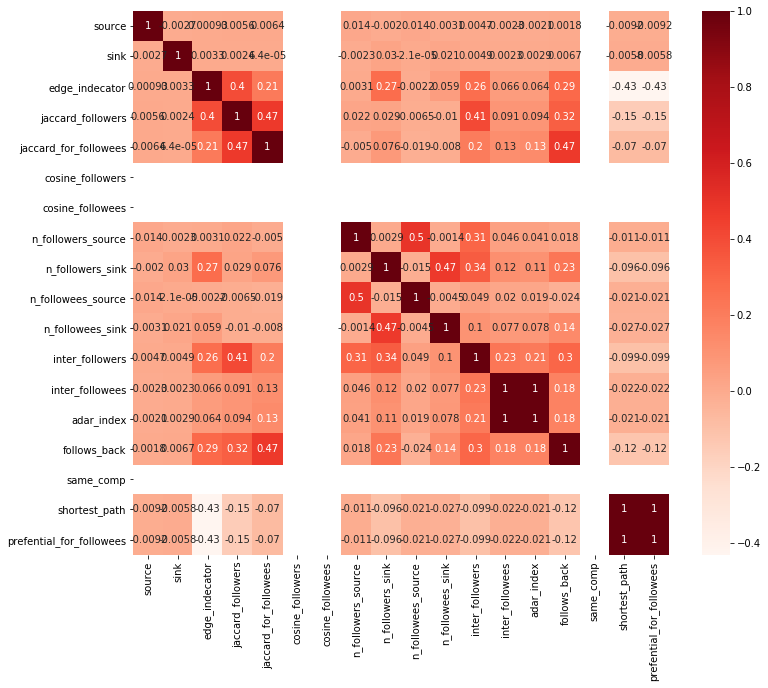

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_final_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["edge_indecator"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

edge_indecator              1.000000
jaccard_followers           0.397312
shortest_path               0.431300
prefential_for_followees    0.431300
Name: edge_indecator, dtype: float64

In [14]:
def find_correlation(df, thresh=0.5):
    """
    Given a numeric pd.DataFrame, this will find highly correlated features,
    and return a list of features to remove
    params:
    - df : pd.DataFrame
    - thresh : correlation threshold, will remove one of pairs of features with
               a correlation greater than this value
    """
    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

    already_in = set()
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)


    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [15]:
find_correlation(df_final_test, thresh=0.5)

['jaccard_followers',
 'n_followers_source',
 'n_followers_sink',
 'inter_followees',
 'shortest_path']

In [284]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
#df_final_train, y_train = make_classification(n_samples=1000, n_features=25, n_informative=5,
                         #  n_redundant=2, n_repeated=0, n_classes=8,
                          # n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.

svc = LogisticRegression(C=15, max_iter = 500, tol = .0000001, random_state = 42)
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',verbose=2, n_jobs=-1)

rfecv.fit(df_final_train, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

KeyboardInterrupt: 

In [ ]:
rfecv.ranking_

In [ ]:
df_final_test

In [66]:
df_final_train.drop(['source', 'sink','edge_indecator','jaccard_followers','n_followers_source','n_followers_sink','shortest_path','inter_followees'],axis=1,inplace=True)

KeyError: "['n_followers_sink'] not found in axis"

In [18]:
df_final_test.drop(['source', 'sink','jaccard_followers','n_followers_source','n_followers_sink','shortest_path','inter_followees'],axis=1,inplace=True)

In [ ]:
# y = X.edge_indecator

In [ ]:
# test = df_final_test[['prefential_for_followees','jaccard_followers','jaccard_for_followees','page_rank_s',
#                 'katz_s','hubs_s','hubs_d','follows_back','authorities_s','adar_index','shortest_path']]

In [67]:
df_final_train.drop(['edge_indecator'],axis=1,inplace=True)

In [ ]:
# #drop unwanted columns
#df_final_train.drop(['source', 'sink','edge_indecator','cosine_followers','cosine_followees','inter_followers','inter_followees','adar_index','jaccard_for_followees','jaccard_followers','n_followees_source','n_followees_sink','page_rank_s','page_rank_d','katz_s','katz_d','authorities_d','hubs_d'],axis=1,inplace=True)
# df_final_test.drop(['source', 'sink','cosine_followers','cosine_followees','inter_followers','inter_followees','adar_index','jaccard_for_followees','jaccard_followers','n_followees_source','page_rank_s','page_rank_d','katz_s','katz_d','authorities_d','hubs_d'],axis=1,inplace=True)

In [489]:
X = df_final_train[['prefential_for_followees','jaccard_followers','page_rank_s','katz_s','adar_index','inter_followers']]

In [490]:
test = df_final_test [['prefential_for_followees','jaccard_followers','page_rank_s','katz_s','adar_index','inter_followers']]

In [68]:
print(df_final_train.shape)

(500001, 25)


In [69]:
print(df_final_test.shape)

(2000, 25)


In [22]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
100047    0
100048    0
100049    0
100050    0
100051    0
Name: edge_indecator, Length: 100052, dtype: int64

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(df_final_train, Y, test_size=0.3,random_state = 42)
#droppingcolumns = []
#X_train = X_train.drop(droppingcolumns, axis=1)
#X_test = X_test.drop(droppingcolumns, axis=1)
#X = X.drop(droppingcolumns, axis=1)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(350000, 25) (150001, 25) (350000,) (150001,)


## Scaling

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_valid)
test_data = scaler.transform(df_final_test)
print(X_train.shape)
print(X_valid.shape)
print(test_data.shape)

(350000, 25)
(150001, 25)
(2000, 25)


## Modeling

In [72]:
# MLP classifiere 
model = MLPClassifier(activation='relu', alpha=0.01, batch_size=64, beta_1=0.2,
              beta_2=0.999, early_stopping=True, epsilon=1e-09,
              hidden_layer_sizes=17, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.7, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=64, beta_1=0.2,
              beta_2=0.999, early_stopping=True, epsilon=1e-09,
              hidden_layer_sizes=17, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.7, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

In [73]:
result = model.score(X_valid, y_valid)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 50.16%


In [74]:
pre=model.predict_proba(X_valid)
# print(pre)
y_pre=[p[1] for p in pre]
acc=model.score(X_valid,y_valid)
print(acc)
auc=roc_auc_score(y_valid,y_pre)
print(auc)

0.5015633229111806
0.5


No Skill: ROC AUC=0.500
MLP: ROC AUC=0.864


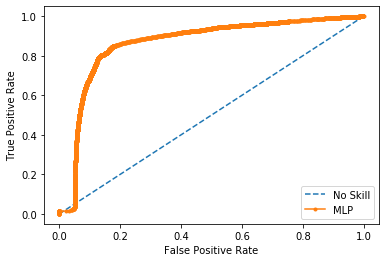

In [462]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]
# predict probabilities
mlp_probs = model.predict_proba(X_valid)

# keep probabilities for the positive outcome only
mlp_probs = mlp_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)

mlp_auc=roc_auc_score(y_valid,mlp_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (mlp_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid,mlp_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# another try to fit and evaluate the model using K-fold Cross-Validation
# this validation startegy improves the performance of the model and could be a better model validation strategy
kfold = model_selection.KFold(n_splits=10, random_state=30)
model_kfold = model.fit(X,y) 
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (results_kfold.mean(), results_kfold.std() * 2))

In [ ]:
results_kfold

In [547]:
# apply the MLP model to the unseen test dataset
#x_testing = test.iloc[:,0:2].values
predictions=model.predict_proba(test_data)

In [ ]:
predictions

In [548]:
#convert the prediction to the csv file
with open("preMLP-5.csv","w",newline="") as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow(["Id","Predicted"])
    test_id=1
    for prediction in predictions:
        writer.writerow([test_id,prediction[1]])
        test_id+=1